# Helmet Streamer Simulation Program

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
###############################################################################
#                                Parameters                                   #
# Set the paramater:                                                          #
#       number of gridpoints:   N_x, N_y, N_z                                 #
#       number of timesteps:    N_t                                           #
#       simuletad box size:     x_min, x_max, y_min, y_max, z_min, z_max      #
#       gamma:                                                                #
#       mu:                                                                   #
###############################################################################
N_x, N_y, N_z, N_t = 100, 100, 100, 5
x_min, x_max, y_min, y_max, z_min, z_max = 0, 5, -0.5, 0.5, -0.5, 0.5
gamma = 5/3
mu = 1

In [4]:
###############################################################################
#                                   Main                                      #
###############################################################################

# calculate geometric step sizes
delta_x, delta_y, delta_z =  (x_max - x_min)/N_x, (y_max - y_min)/N_y, (z_max - z_min)/N_z

# generate grid coordinates
x, y, z = np.linspace(x_min, x_max, N_x), np.linspace(y_min, y_max, N_y), np.linspace(z_min, z_max, N_z)
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')


In [5]:
# declare 4 dimensional array: [time, x, y, z]
#       plasma velocity: vx, vy, vz     vector potential: ax, ay, az    magnetic field: bx, by, bz      
#       electric field:  ex, ey, ez     current density:  jx, jy, jz    energy density: energy
#       mass density:    rho            plasma pressure:  p             magn. resistivity: eta
#       divergence of b:  gauss                                 
vx, vy, vz = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
ax, ay, az = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
bx, by, bz = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
ex, ey, ez = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
jx, jy, jz = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
energy, eta, gauss = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
p, rho = np.zeros((N_t, N_x, N_y, N_z)), np.zeros((N_t, N_x, N_y, N_z))
dt = np.zeros(N_t)

# initial condition

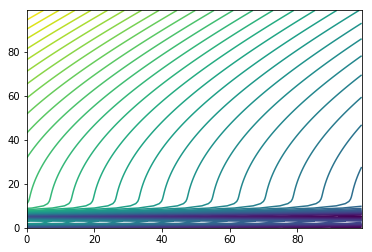

In [8]:
x0 = 0
x02 = np.zeros((N_x, N_y, N_z))
a, eta0, zcusp = 0.1, 0.0005, 4

ho = 10
a_s = 0.1
c1 = 15
c2 = 15 
s1 = 0.8
s2 = 0.4
s3 = 0.2
k1 = 1
k2 = k1*np.exp(-(c1 + c2)*a_s)
x01 = 0.0

p0 = s1*np.exp(-s2*Z)+s3 
p[:] = p0

xsep = ((1/c1)*np.sqrt(2/p0)
       *np.arctanh(np.sqrt((p0 - k1*np.exp(-c1*a_s))/p0)))
#          *datanh(dsqrt((p0 - k1*np.exp(-c1*as))/p0),val)   

p1 = np.exp(s2*Z)*s3+s1
p2 = np.exp(a_s*c1+s2*Z)
p3 = np.exp(s2*Z)
p4 = np.exp(a_s*c1)
p5 = np.sqrt((p3*s3+s1)/(2*p3))
p6 = np.sqrt((-k1*p3+p3*p4*s3+p4*s1)/(p3*p4*s3+p4*s1))
p7 = c1*p5*X-c1*p5*x0
p8 = (np.sqrt((2*p3)/(p3*s3+s1))*np.arctanh(p6)*c1*p5 
      + np.sqrt((2*p3)/(p3*s3+s1))*np.arctanh(p6)*c2*p5 
      - c1*c2*p5*x0-c2*p7)

#    if(x .le. xsep) then X<xsep
ay[0,X<xsep] = (-(2/c1)*np.log(np.cosh(c1*np.sqrt(p0[X<xsep]/2)
                *(X[X<xsep] - 0)))+(1/c1)*np.log(p0[X<xsep]/k1))
bx[0,X<xsep] = ((s1*s2*(2*np.cosh(p7[X<xsep])*p3[X<xsep]*p5[X<xsep]
                -np.sinh(p7[X<xsep])*c1*p3[X<xsep]*s3*X[X<xsep] + np.sinh(p7[X<xsep])*c1*p3[X<xsep]*s3*x0
                -np.sinh(p7[X<xsep])*c1*s1*X[X<xsep] + np.sinh(p7[X<xsep])*c1*s1*x0))/
                (2*np.cosh(p7[X<xsep])*c1*p3[X<xsep]*p5[X<xsep]*(p3[X<xsep]*s3+s1)))
bz[0,X<xsep] = (-2*np.sinh(p7[X<xsep])*p5[X<xsep])/np.cosh(p7[X<xsep])
jy[0,X<xsep] = c1*p0[X<xsep]/(np.cosh(c1*X[X<xsep]*np.sqrt(p0[X<xsep]/2)))

#    else X>=xsep
x02[X>=xsep] = (np.arctanh(np.sqrt((p0[X>=xsep] - k1*np.exp(-c1*a_s))/p0[X>=xsep]))*
                np.sqrt(2/p0[X>=xsep])*(1/c1 + 1/c2))
ay[0,X>=xsep]= (-(2/c2)*np.log(np.cosh(c2*np.sqrt(p0[X>=xsep]/2)
                *(X[X>=xsep] - x02[X>=xsep])))+(1/c2)*np.log(p0[X>=xsep]/k2))
bx[0,X>=xsep] = ((s1*s2*(2*np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                np.cosh(p8[X>=xsep]/c1)*c1*p3[X>=xsep]*p5[X>=xsep]*p6[X>=xsep]
                + np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                np.sinh(p8[X>=xsep]/c1)*c1*c2*p3[X>=xsep]*p6[X>=xsep]*s3*X[X>=xsep]
                + np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                np.sinh(p8[X>=xsep]/c1)*c1*c2*p6[X>=xsep]*s1*X[X>=xsep]
                - 2*np.sinh(p8[X>=xsep]/c1)*c1*p3[X>=xsep]
                - 2*np.sinh(p8[X>=xsep]/c1)*c2*p3[X>=xsep]))/
                (2*np.sqrt((2*p3[X>=xsep])/(p3[X>=xsep]*s3+s1))*
                 np.cosh(p8[X>=xsep]/c1)*c1*c2*p3[X>=xsep] *
                 p5[X>=xsep]*p6[X>=xsep]*(p3[X>=xsep]*s3+s1)))
bz[0,X>=xsep] = (2*np.sinh(p8[X>=xsep]/c1)*p5[X>=xsep])/np.cosh(p8[X>=xsep]/c1)
jy[0,X>=xsep] = c2*p0[X>=xsep]/(np.cosh(c2*X[X>=xsep]*np.sqrt(p0[X>=xsep]/2)))

ax[:] = 0
az[:] = 0
by[:] = 0
gauss[:] = 0
rho[:] = p[:]*np.exp(-Z/ho)
jx[:] = 0
jz[:] = 0
energy[:] = (p[:]/(gamma - 1) + (bx[:]*bx[:] + by[:]*by[:]+ bz[:]*bz[:])/(2*mu))
eta[:] = (eta0*np.exp(-a*(Z-zcusp))*
                np.tanh(abs(jy[:])))
#                   np.tanh(abs(dble(xjy(n,i,j,k))),val)
ex[:] = 0
ey[:] = eta[:]*jy[:]
ez[:] = 0   



plt.contour(energy[0, :, int(N_x/2)], 40)#, extent=(-0.5, 0.5, 0, 5))
plt.show()

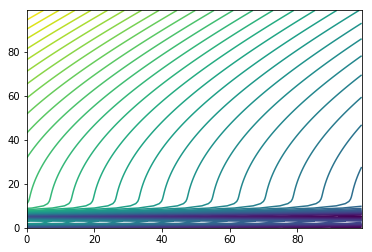